In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Dataset

In [97]:
data = pd.read_csv('car_age_price.csv')

In [98]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [99]:
data.shape

(112, 2)

# checking for null values

In [100]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

# Correlation matrix

In [117]:
corr_matrix = data.corr()
corr_matrix

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


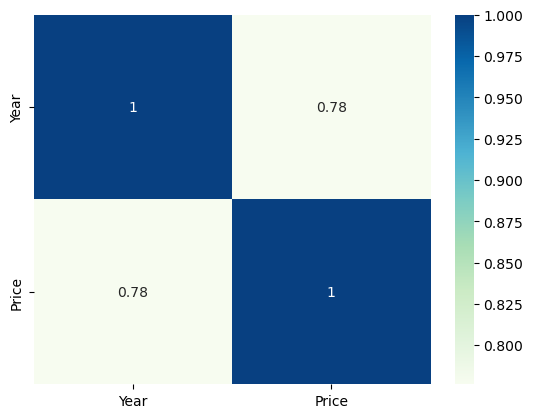

In [118]:
plt.subplots()
sns.heatmap(corr_matrix,annot=True,cmap='GnBu')
plt.show()

# Separate target and independant columns

In [103]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [104]:
x=data.drop(['Price'],axis=1)
y=data['Price']

In [105]:
x,y

(     Year
 0    2018
 1    2019
 2    2019
 3    2018
 4    2018
 ..    ...
 107  2016
 108  2014
 109  2015
 110  2016
 111  2015
 
 [112 rows x 1 columns],
 0      465000
 1      755000
 2      700000
 3      465000
 4      465000
         ...  
 107    375000
 108    300000
 109    425000
 110    420000
 111    425000
 Name: Price, Length: 112, dtype: int64)

# Splitting Test and Train data

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

# Linear Regression

In [107]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [108]:
model_linear=lr.fit(x_train,y_train)
linear_predictions = model_linear.predict(x_test)

In [109]:
from sklearn.metrics import mean_squared_error,r2_score

In [110]:
print('Mean Squared Error = ',mean_squared_error(y_test,linear_predictions))
print('R Squared Value = ',r2_score(y_test,linear_predictions))

Mean Squared Error =  3878767151.073449
R Squared Value =  0.4347961632108023


# 2022 Price Prediction for grand I10 using linear regression

In [111]:
year = [[2022]]
linear_2022_predictions = model_linear.predict(year)
print(linear_2022_predictions)

[740160.11937766]


C:\Users\002H26744\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Lasso Regression

In [112]:
from sklearn.linear_model import Lasso

In [113]:
lasso = Lasso(alpha=0.1)
model_lasso = lasso.fit(x_train, y_train)

In [114]:
lasso_predictions = model_lasso.predict(x_test)

In [115]:
print('Mean Squared Error = ',mean_squared_error(y_test,lasso_predictions))
print('R Squared Value = ',r2_score(y_test,lasso_predictions))

Mean Squared Error =  3878764025.5442586
R Squared Value =  0.43479661865476726


# 2022 Price Prediction for grand I10 using lasso regression

In [116]:
lasso_2022_predictions = model_lasso.predict(year)
print(lasso_2022_predictions)

[740159.90314002]


C:\Users\002H26744\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
